In [67]:
from pathlib import Path
import torch
import torchvision
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.style.use("seaborn")

/var/folders/jg/n0tm885d5bl0s28798vc5mt00000gp/T/ipykernel_2482/2166390125.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [71]:
num_videos = 5

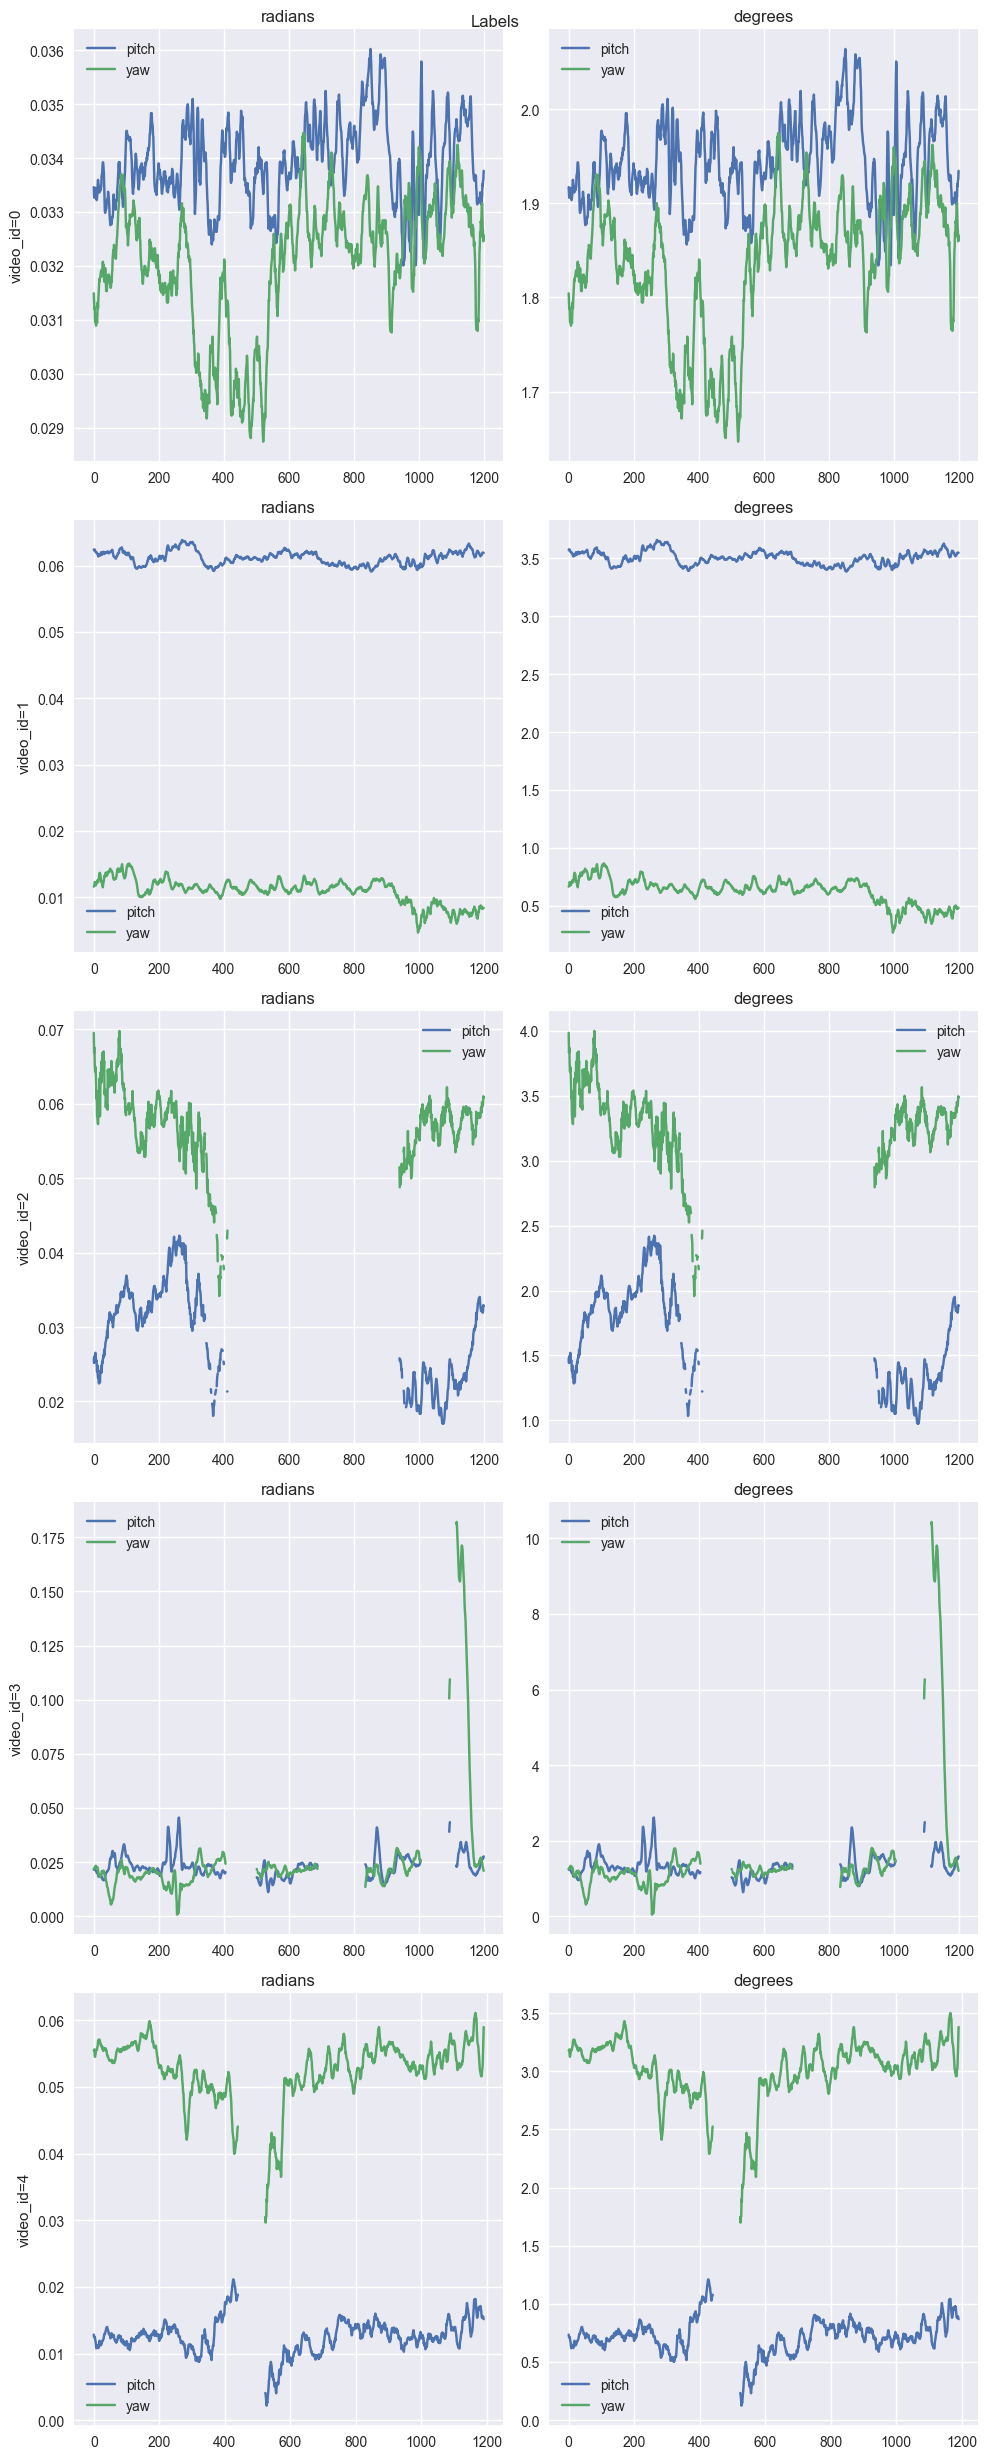

In [73]:
def load_data(video_id):
    video_path = f"calib_challenge/labeled/{video_id}.hevc"
    label_path = f"calib_challenge/labeled/{video_id}.txt"

    vc = cv2.VideoCapture(video_path)
    labels_r = np.genfromtxt(label_path, delimiter=" ")
    labels_d = np.rad2deg(labels_r)

    return vc, labels_r, labels_d

nrows = num_videos
ncols = 2

fig, axrows = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
fig.suptitle("Labels")

for video_id in range(num_videos):
    vc, labels_r, labels_d = load_data(video_id)

    ax0, ax1 = axrows[video_id]

    ax0.set_ylabel(f"{video_id=}")

    ax0.set_title("radians")
    ax0.plot(labels_r[:, 0], label="pitch")
    ax0.plot(labels_r[:, 1], label="yaw")

    ax1.set_title("degrees")
    ax1.plot(labels_d[:, 0], label="pitch")
    ax1.plot(labels_d[:, 1], label="yaw")

    ax0.legend()
    ax1.legend()

plt.tight_layout()
plt.show()

In [62]:
vc = cv2.VideoCapture(video_path)
labels_r = np.genfromtxt(label_path, delimiter=" ")
labels_d = np.rad2deg(labels_r)

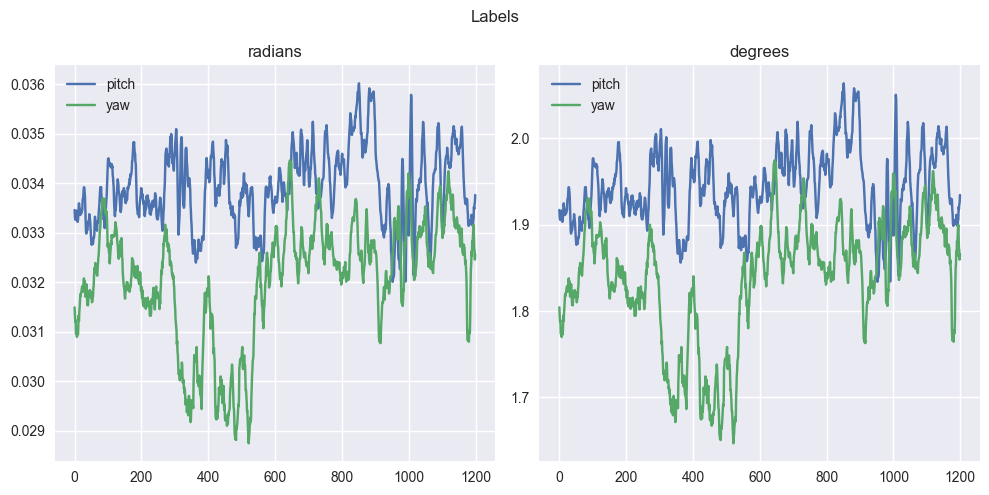

In [70]:
nrows = 1
ncols = 2

fig, (ax0, ax1) = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
fig.suptitle("Labels")

ax0.set_title("radians")
ax0.plot(labels_r[:, 0], label="pitch")
ax0.plot(labels_r[:, 1], label="yaw")

ax1.set_title("degrees")
ax1.plot(labels_d[:, 0], label="pitch")
ax1.plot(labels_d[:, 1], label="yaw")

ax0.legend()
ax1.legend()
plt.tight_layout()
plt.show()

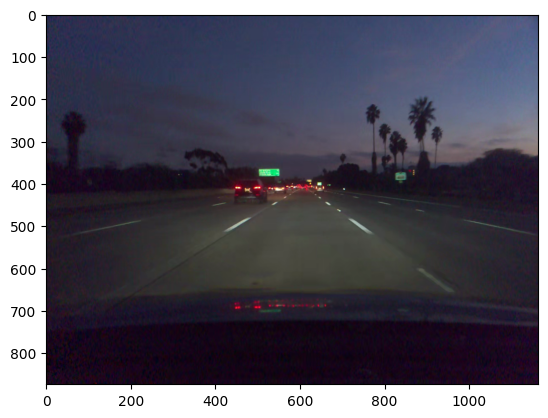

In [46]:
ret, frame = vc.read()
if ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)